In [65]:
import numpy as np 
import pandas as pd # for working with dataframes
import seaborn as sns # for data visualization 

from matplotlib import pyplot as plt # for plotting
%matplotlib inline
sns.set_style("whitegrid")

import warnings # http://blog.johnmuellerbooks.com/2015/11/30/warnings-in-python-and-anaconda/
warnings.filterwarnings("ignore")

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

cid ="162a38387688451f892841c7abd6e094" 
secret = "xx"

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [66]:
dataframe = pd.read_csv('SpotifyFeatures.csv')
dataframe.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [67]:
dataframe.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


In [68]:
print(dataframe.keys())

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')


Text(0.5, 1.0, 'Popularity Distribution')

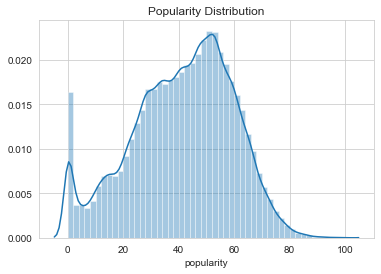

In [69]:
sns.distplot(dataframe['popularity']).set_title('Popularity Distribution')

In [70]:
list_of_keys = dataframe['key'].unique()
for i in range(len(list_of_keys)):
    dataframe.loc[dataframe['key'] == list_of_keys[i], 'key'] = i
dataframe.sample(5)


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
231698,Soul,Beverley Knight,Middle of Love,2dqg6jHb6ubKaXi4GbnYi0,49,0.115,0.744,250719,0.7580,0.000033,11,0.0958,-4.786,Major,0.0732,108.130,4/4,0.431
128688,Classical,Wolfgang Amadeus Mozart,"Violin Concerto No. 2 in D Major, K. 211 - Cad...",1eSi4z5JBodBm0s3uAzXDZ,31,0.973,0.422,506565,0.0488,0.703000,8,0.1130,-23.858,Major,0.0509,72.945,4/4,0.319
68011,Hip-Hop,Westside Connection,Gangsta Nation,65iyI1iybyv5ecsfBHSdUf,69,0.127,0.843,293053,0.7000,0.000000,10,0.8760,-3.249,Minor,0.2600,95.050,4/4,0.675
168540,Comedy,Dane Cook,Syncing Feeling,3rKR5wG3x518KKr6fkRBUy,31,0.849,0.507,60960,0.8320,0.000000,4,0.9630,-3.300,Major,0.6680,173.159,3/4,0.906
76531,Children's Music,The Hit Crew Kids,Baby Bunting,0jlQIUTd2C3cnXFDndW1z0,0,0.842,0.498,66507,0.0528,0.000000,4,0.0519,-9.050,Major,0.0460,200.117,3/4,0.787


In [71]:
dataframe.loc[dataframe["mode"] == 'Major', "mode"] = 1
dataframe.loc[dataframe["mode"] == 'Minor', "mode"] = 0
dataframe.sample(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
65631,Folk,Michael Nau,While You Stand,2UcMAGioSRu1GZj6r0Qa7x,36,0.96800,0.742,175667,0.104,0.028100,8,0.1080,-17.550,1,0.0548,123.543,4/4,0.3450
98835,Children’s Music,Eric B. & Rakim,Don't Sweat The Technique,48ZUwXrEOhaXLCxvmRYhZv,55,0.00731,0.754,262800,0.888,0.002120,5,0.0821,-8.393,1,0.1760,105.927,4/4,0.7810
69345,Hip-Hop,Bas,Icarus (feat. Ari Lennox),5IU4Ym8qNpQFIo0EXUceRr,59,0.30000,0.764,262813,0.491,0.000002,5,0.1150,-8.559,0,0.2420,103.996,4/4,0.2430
53923,R&B,Niykee Heaton,Starting Over,15jMztFtJ1mFFJ11SZvHHZ,65,0.39000,0.751,227097,0.394,0.000000,4,0.1210,-6.560,1,0.0519,135.896,4/4,0.1200
229923,Soul,Wet,Move Me,0RKp3zVhtwQevLWlJbEMCK,45,0.65300,0.524,216840,0.360,0.092500,10,0.0907,-10.340,0,0.0318,103.909,4/4,0.0588


In [72]:
list_of_time_signatures = dataframe['time_signature'].unique()
for i in range(len(list_of_time_signatures)):
    dataframe.loc[dataframe['time_signature'] == list_of_time_signatures[i], 'time_signature'] = i
dataframe.sample(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
160323,Reggaeton,J Balvin,Sin Compromiso,3yoO9jbPHRxAsoUuyx4gG3,43,0.19300,0.775,189027,0.914,0.000,4,0.4270,-4.738,1,0.1590,98.031,0,0.8170
199351,Soundtrack,Alan Menken,Transformations,7eSfMDBYWpy7gh6dhrbFdF,44,0.47800,0.198,246760,0.326,0.504,9,0.1860,-13.564,1,0.0350,117.609,0,0.0851
191315,Ska,We Are The Union,We're Gonna Need A Bigger Boat,7z2X6GZL8JMKNI6R87VBw6,14,0.00143,0.506,157990,0.927,0.000,3,0.2300,-4.194,0,0.0532,108.007,0,0.6220
14257,Dance,Chris Brown,Run It!,6SPD3JwwRejBhCDiQAQ4he,66,0.02460,0.850,229867,0.482,0.000,0,0.3870,-6.684,0,0.1020,100.957,0,0.2170
13284,Alternative,Alex Cameron,Divorce,6PYw8nnHdqLz7bJ8N4uRvu,43,0.37000,0.526,192933,0.738,0.000,4,0.0842,-5.260,1,0.0358,144.565,0,0.8980


In [73]:
dataframe.loc[dataframe['popularity'] < 57, 'popularity'] = 0 
dataframe.loc[dataframe['popularity'] >= 57, 'popularity'] = 1
dataframe.loc[dataframe['popularity'] == 1]

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
135,R&B,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,1,0.08300,0.724,246333,0.6890,0.000000,8,0.3040,-5.922,0,0.1350,146.496,0,0.6930
136,R&B,Rihanna,Desperado,6KFaHC9G178beAp7P0Vi5S,1,0.32300,0.685,186467,0.6100,0.000000,2,0.1020,-5.221,0,0.0439,94.384,2,0.3230
137,R&B,Yung Bleu,Ice On My Baby (feat. Kevin Gates) - Remix,6muW8cSjJ3rusKJ0vH5olw,1,0.06750,0.762,199520,0.5200,0.000004,3,0.1140,-5.237,0,0.0959,75.047,0,0.0862
138,R&B,Surfaces,Heaven Falls / Fall on Me,7yHqOZfsXYlicyoMt62yC6,1,0.36000,0.563,240597,0.3660,0.002430,11,0.0955,-6.896,0,0.1210,85.352,0,0.7680
139,R&B,Olivia O'Brien,Love Myself,4XzgjxGKqULifVf7mnDIQK,1,0.59600,0.653,213947,0.6210,0.000000,11,0.0811,-5.721,0,0.0409,100.006,0,0.4660
140,R&B,ELHAE,Needs,7KdRu0h7PQ0Ecfa37rUBzW,1,0.66100,0.510,205640,0.3310,0.000000,11,0.1230,-13.073,0,0.0895,124.657,0,0.2250
141,R&B,Nao,Make It Out Alive (feat. SiR),21Ft8ME799DMZjxNwmui6Z,1,0.66700,0.670,239147,0.6490,0.000130,2,0.1090,-7.426,0,0.0875,147.935,0,0.6180
142,R&B,Frank Ocean,Seigfried,1BViPjTT585XAhkUUrkts0,1,0.97500,0.377,334570,0.2550,0.000208,5,0.1020,-11.165,0,0.0387,125.004,1,0.3700
143,R&B,Layton Greene,Roll In Peace,33YFwLJbAdgePluIuEVa9p,1,0.72000,0.523,170343,0.5070,0.000000,4,0.0774,-6.448,0,0.2250,140.368,0,0.7000
144,R&B,Usher,You Make Me Wanna...,47TqCCnEliDp8NRDyIQoQq,1,0.03590,0.761,219120,0.6390,0.000000,3,0.0945,-7.577,0,0.0539,164.088,0,0.9220


In [77]:
genre = ["A Capella", "Alternative", "Anime", "Alternative", "Blues", "Children's Music", "Children’s Music", 
         "Classical", "Comedy", "Country", "Dance", "Electronic", "Folk", "Hip-Hop", "Indie", "Jazz", "Movie",
         "Opera", "Pop", "R&B", "Rap", "Raggae", "Raggaeton", "Rock", "Ska", "Soul", "Soundtrack", "World"]
popularity = []

genre_group = dataframe.groupby("genre")
total_popularity = (genre_group["genre"].sum())

dataframe = total_popularity.dropna(how="any")
total_popularity.count()
genre_group.head()


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611000,0.389,99373,0.9100,0.000000,0,0.3460,-1.828,1,0.0525,166.969,0,0.8140
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,0,0.246000,0.590,137373,0.7370,0.000000,1,0.1510,-5.559,0,0.0868,174.003,0,0.8160
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,0,0.952000,0.663,170267,0.1310,0.000000,2,0.1030,-13.879,0,0.0362,99.488,1,0.3680
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703000,0.240,152427,0.3260,0.000000,0,0.0985,-12.178,1,0.0395,171.758,0,0.2270
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,0,0.950000,0.331,82625,0.2250,0.123000,3,0.2020,-21.150,1,0.0456,140.576,0,0.3900
135,R&B,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,1,0.083000,0.724,246333,0.6890,0.000000,8,0.3040,-5.922,0,0.1350,146.496,0,0.6930
136,R&B,Rihanna,Desperado,6KFaHC9G178beAp7P0Vi5S,1,0.323000,0.685,186467,0.6100,0.000000,2,0.1020,-5.221,0,0.0439,94.384,2,0.3230
137,R&B,Yung Bleu,Ice On My Baby (feat. Kevin Gates) - Remix,6muW8cSjJ3rusKJ0vH5olw,1,0.067500,0.762,199520,0.5200,0.000004,3,0.1140,-5.237,0,0.0959,75.047,0,0.0862
138,R&B,Surfaces,Heaven Falls / Fall on Me,7yHqOZfsXYlicyoMt62yC6,1,0.360000,0.563,240597,0.3660,0.002430,11,0.0955,-6.896,0,0.1210,85.352,0,0.7680
139,R&B,Olivia O'Brien,Love Myself,4XzgjxGKqULifVf7mnDIQK,1,0.596000,0.653,213947,0.6210,0.000000,11,0.0811,-5.721,0,0.0409,100.006,0,0.4660
